# Experimento #1
---

Este notebook de python tiene como finalidad realizar un EDA de los datos existentes en el directorio `data`.

In [1]:
import os
import PIL
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path
from PIL import Image

In [2]:
cwd = str(os.getcwd())
cw_path = Path(cwd)

print('El directorio de trabajo actual es: ' + cwd)
print('El directorio de trabajo actual es: ' + str(cw_path))

El directorio de trabajo actual es: C:\Users\Public\Code\Python\Notebooks\reti-exp\notebooks
El directorio de trabajo actual es: C:\Users\Public\Code\Python\Notebooks\reti-exp\notebooks


In [3]:
data_dir = os.path.join(cw_path.parent, 'data')

In [12]:
def add_image_to_dic_by_set_name(setName, file):
    if setName == 'train':
        data_dic['train'].append(file)
    elif setName == 'test':
        data_dic['test'].append(file)
    elif setName == 'valid':
        data_dic['valid'].append(file)
        
def is_image(file):
    return ( (file.endswith('png') or file.endswith('PNG')) or
             (file.endswith('jpg') or file.endswith('JPG')) or
             (file.endswith('jpeg') or file.endswith('JPEG'))) 

Obtenemos los datos de nuestros conjuntos

In [13]:
data_dic = {
    'train': [],
    'test': [],
    'valid': []
}

In [14]:
for split_dir in os.listdir(data_dir):
    # variable that containts the temporary splitted directory
    dataset_dir = os.path.join(data_dir, split_dir)
    for subdir in os.listdir(dataset_dir):
        class_dir = os.path.join(dataset_dir, subdir)
        for img in os.listdir(class_dir):
            full_image_path = os.path.join(class_dir, img)
            if is_image(full_image_path):
                img_as_np = np.array(Image.open(full_image_path))
                add_image_to_dic_by_set_name(split_dir, img_as_np)

Analizamos la división de datos

In [15]:
train_data_len = len(data_dic['train'])
test_data_len  = len(data_dic['test'])
valid_data_len = len(data_dic['valid'])

total_data = train_data_len + test_data_len + valid_data_len

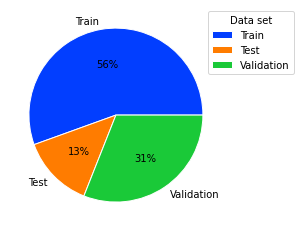

In [16]:
palette_color = sns.color_palette('bright')  
plt.pie([train_data_len, test_data_len, valid_data_len],
         labels=['Train', 'Test', 'Validation'], 
         colors=palette_color,
         autopct='%.0f%%',
         wedgeprops = {"linewidth": 1, "edgecolor": "white"}) 
  
# displaying chart
plt.legend(title='Data set', bbox_to_anchor = (0.9, 1.0))
plt.show() 

Notamos que la distribución del data set es la siguiente:
- 56% para entrenamiento
- 13% para pruebas
- 31% para validación

#### Visualizamos una imagen de ejemplo

In [23]:
rand_img = data_dic['train'][10]                 

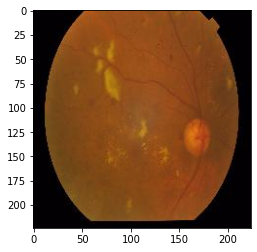

In [24]:
plt.imshow(rand_img)
plt.show()

Dimensión de la imagen de prueba

In [20]:
rand_img.shape

(224, 224, 3)